# City Council

In [1]:
import geopandas as gpd

In [2]:
cc = gpd.read_file('data/council.zip').to_crs(4267)
cc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OBJECTID    9 non-null      int64         
 1   DISTRICTNU  9 non-null      int64         
 2   COUNCILORN  9 non-null      object        
 3   WEBPAGE     9 non-null      object        
 4   PICTURE     9 non-null      object        
 5   created_us  9 non-null      object        
 6   created_da  9 non-null      datetime64[ms]
 7   last_edite  9 non-null      object        
 8   last_edi_1  9 non-null      datetime64[ms]
 9   COUNCILORE  9 non-null      object        
 10  POLICYANAL  9 non-null      object        
 11  ANALYSTEMA  8 non-null      object        
 12  ANALYSTPHO  9 non-null      object        
 13  STAr        9 non-null      float64       
 14  STLe        9 non-null      float64       
 15  geometry    9 non-null      geometry      
dtypes: datetime64[ms](2), 

In [3]:
drops = [
    'STLe', 'STAr', 'last_edi_1', 'last_edite',
    'created_da', 'created_us'
]
cc.drop(columns=drops, inplace=True)
cc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    9 non-null      int64   
 1   DISTRICTNU  9 non-null      int64   
 2   COUNCILORN  9 non-null      object  
 3   WEBPAGE     9 non-null      object  
 4   PICTURE     9 non-null      object  
 5   COUNCILORE  9 non-null      object  
 6   POLICYANAL  9 non-null      object  
 7   ANALYSTEMA  8 non-null      object  
 8   ANALYSTPHO  9 non-null      object  
 9   geometry    9 non-null      geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 852.0+ bytes


In [5]:
cc.drop(columns=['PICTURE'], inplace=True)

In [6]:
cc.iloc[0]

OBJECTID                                                   1004
DISTRICTNU                                                    2
COUNCILORN                                         Joaquin Baca
WEBPAGE       http://www.cabq.gov/council/find-your-councilo...
COUNCILORE                                 joaquinbaca@cabq.gov
POLICYANAL                                     Nathan A. Molina
ANALYSTEMA                                    namolina@cabq.gov
ANALYSTPHO                                         505-768-3332
geometry      POLYGON ((-106.64982997778552 35.1502817930045...
Name: 0, dtype: object

In [7]:
name_changes = dict(
    DISTRICTNU = 'District', 
    COUNCILORN = 'Councilor', 
    WEBPAGE = 'Webpage', 
    COUNCILORE = 'Email', 
    POLICYANAL = 'PolicyAnalystName', 
    ANALYSTEMA = 'PolicyAnalystEmail', 
    ANALYSTPHO = 'PolicyAnalystPhone'
)
cc.rename(columns=name_changes, inplace=True)
cc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   OBJECTID            9 non-null      int64   
 1   District            9 non-null      int64   
 2   Councilor           9 non-null      object  
 3   Webpage             9 non-null      object  
 4   Email               9 non-null      object  
 5   PolicyAnalystName   9 non-null      object  
 6   PolicyAnalystEmail  8 non-null      object  
 7   PolicyAnalystPhone  9 non-null      object  
 8   geometry            9 non-null      geometry
dtypes: geometry(1), int64(2), object(6)
memory usage: 780.0+ bytes


In [8]:
cc.to_file('../../../localData/City/city_council.gpkg')
cc.to_file('../../../data/local/abq_city_data.gpkg', 
                     layer='city_council')

In [12]:
import contextily as ctx

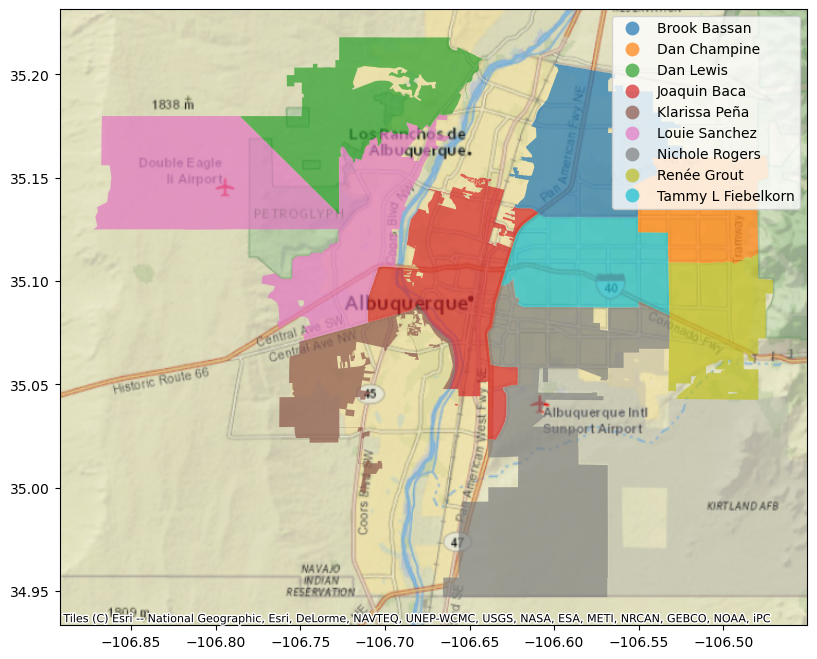

In [17]:
ax = cc.plot(column='Councilor', legend=True, figsize=(10,8), alpha=0.7)
ctx.add_basemap(ax=ax, crs=cc.crs, source=ctx.providers.Esri.NatGeoWorldMap);